<a href="https://colab.research.google.com/github/mperricone24/Final-Project-/blob/main/MP4415_Python_Final_Project_Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:

Understanding how to invest across different market conditions requires examining how assets perform during both stability and turbulence. Institutional and individual investors often differ in risk tolerance and investment horizons, with individuals typically favoring steady, long-term growth, while institutions trade more frequently and pursue higher returns despite volatility. This analysis examines correlations and long-run trends among four major indicators: the S&P 500 Index, Gold Prices, Brent Crude Oil Prices, and the CBOE Volatility Index (VIX). Together, these metrics capture essential aspects of market behavior: the S&P 500 reflects overall market sentiment, Brent Crude signals inflationary pressures, Gold represents a hedge against uncertainty, and the VIX gauges volatility and investor fear. The normalized time-series plot and correlation matrix illustrate how these assets have interacted from 2015 to 2024, a decade defined by unprecedented monetary policy, the COVID-19 pandemic, and the Russian invasion of Ukraine, offering insights into market resilience under stress.

# Methodology:

To conduct this analysis, I utilized several Python libraries: Pandas, Plotly Express, Seaborn, and Matplotlib.pyplot. I first used Pandas to create and organize dataframes from the uploaded CSVs, allowing me to explore and manipulate the data. With Plotly Express, I generated interactive line graphs to visualize the trends of each dataset over the 10-year period. These visualizations provided an initial understanding of how each asset evolved over time.

However, comparing the datasets directly proved difficult due to the wide range of price levels, from the VIX at around 9 to the S&P 500 exceeding 6,000. To make comparisons meaningful, I normalized each dataset using the formula:

Normalized Value = (Current Value / First Value) × 100.

This approach allowed me to evaluate percentage changes relative to their starting values.

Using Seaborn and Matplotlib.pyplot, I then produced scatter plots with OLS regression trendlines and a comprehensive correlation matrix, which revealed long-term relationships among the four indicators. Together, these tools enabled a holistic, data-driven analysis of market behavior, highlighting how assets responded to major global shocks such as the COVID-19 pandemic and the Russian invasion of Ukraine.

In [1]:
import pandas as pd

In [2]:
import plotly.express as px

In [3]:
Gold_CSV = "https://raw.githubusercontent.com/mperricone24/Final-Project-/refs/heads/main/Gold%20Prices%20monthly%20filtered%20V3.csv"
SP500_CSV = "https://raw.githubusercontent.com/mperricone24/Final-Project-/refs/heads/main/SP500%20(1).csv"
Crude_Oil_CSV = "https://raw.githubusercontent.com/mperricone24/Final-Project-/refs/heads/main/DCOILBRENTEU.csv"
VIX_CSV = "https://raw.githubusercontent.com/mperricone24/Final-Project-/refs/heads/main/VIXCLS.csv"

In [4]:
df_Gold = pd.read_csv(Gold_CSV) #create dataframe for gold prices



In [5]:
df_Gold

,Date,Price
0,NaN,NaN
1,2015-01,1250.75
2,2015-02,1227.08
3,2015-03,1178.63
4,2015-04,1198.93
...,...,...
123,2025-03,2983.25
124,2025-04,3217.64
125,2025-05,3309.49
126,2025-06,3352.66


In [6]:
df_Crude_Oil = pd.read_csv(Crude_Oil_CSV) #create dataframe for Oil price


In [7]:
df_Crude_Oil

,observation_date,DCOILBRENTEU
0,2015-01-02,55.38
1,2015-01-05,51.08
2,2015-01-06,50.12
3,2015-01-07,49.06
4,2015-01-08,49.43
...,...,...
2812,2025-10-14,63.00
2813,2025-10-15,62.33
2814,2025-10-16,61.08
2815,2025-10-17,61.23


In [8]:
df_SP500 = pd.read_csv(SP500_CSV) #create dataframe for SP500


In [9]:
df_SP500

,observation_date,SP500
0,2015-10-23,2075.15
1,2015-10-26,2071.18
2,2015-10-27,2065.89
3,2015-10-28,2090.35
4,2015-10-29,2089.41
...,...,...
2604,2025-10-16,6629.07
2605,2025-10-17,6664.01
2606,2025-10-20,6735.13
2607,2025-10-21,6735.35


In [10]:
df_VIX = pd.read_csv(VIX_CSV) #create dataframe for VIX


In [11]:
df_VIX

,observation_date,VIXCLS
0,2015-01-02,17.79
1,2015-01-05,19.92
2,2015-01-06,21.12
3,2015-01-07,19.31
4,2015-01-08,17.01
...,...,...
2816,2025-10-20,18.23
2817,2025-10-21,17.87
2818,2025-10-22,18.60
2819,2025-10-23,17.30


In [12]:
#create category and numeric columns to use for x and y axis for graphs for each dataframe
category_col_Gold = 'Date'
numeric_col_Gold = 'Price'

In [13]:
category_col_SP500 = 'observation_date'
numeric_col_SP500 = 'SP500'

In [14]:
category_col_Oil = 'observation_date'
numeric_col_Oil = 'DCOILBRENTEU'

In [15]:
category_col_VIX = 'observation_date'
numeric_col_VIX = 'VIXCLS'

In [16]:
#create line graph to visualize the data over time
fig_gold = px.line(df_Gold, x='Date', y='Price', title='Gold Price')
fig_gold.show()

In [17]:
fig_SP500 = px.line(df_SP500, x=category_col_SP500, y=numeric_col_SP500, title='SP500 2016-2025')
fig_SP500.show()

In [35]:
fig_Crude_Oil = px.line(df_Crude_Oil, x=category_col_Oil, y=numeric_col_Oil, title='Crude Oil Prices')
fig_Crude_Oil.show()

In [36]:
fig_VIX = px.line(df_VIX, x=category_col_VIX, y=numeric_col_VIX, title='VIX')
fig_VIX.show()

The following is my conversation with Gemini that enabled me to create the following visuals and code to better analyze the data.

1. is there a way to show the trends of this graph in another graph that makes it easier to understand? give me ideas for now
You're right, comparing the absolute values of datasets with different scales on a single graph can make it challenging to see the trends and relationships clearly. We've already looked at percent change, which is a good way to see relative movements.

Here are a few other ideas for visualizations that could make it easier to understand the trends and relationships between Gold Price, SP500, and Crude Oil Prices:

Normalized Data Plot: Normalize each dataset to a common scale (e.g., starting at 100 or scaling between 0 and 1). This removes the impact of different absolute values and allows for a direct comparison of their growth or decline relative to a starting point.
Smoothed Data Plot: Apply a rolling average or other smoothing techniques to each dataset. This can help to highlight the underlying trends by reducing the noise from short-term fluctuations.
Correlation Matrix or Scatter Plots: While not a line graph over time, you could explore the correlation between the datasets. A correlation matrix can show how strongly the datasets are linearly related, and scatter plots of one dataset against another can reveal potential relationships.
Trendlines: Adding trendlines (like linear regression lines) to the existing overlaid plot can visually represent the overall direction of each dataset over the entire period.
Which of these ideas sounds most interesting to you, or would you like to explore a different approach?


Normalize Gold Price, SP500, and Crude Oil to 100
Okay, I will normalize the Gold Price, SP500, and Crude Oil data so that their starting value is 100. This will allow for easier comparison of their trends over time.

The Gold Price, SP500, and Crude Oil data have been successfully normalized to a base of 100.

Now that the data is on a comparable scale, we can plot the normalized values to easily see how each dataset's value has changed relative to its starting point. Would you like me to create an overlaid line graph showing these normalized trends?


2. Plot the normalized data
Okay, I will plot the normalized data for Gold Price, SP500, and Crude Oil Prices on a single overlaid line graph.

To do this, I will first combine the normalized data from the three DataFrames into one DataFrame and then use Plotly Express to create the plot.

The overlaid line graph showing the normalized Gold Price, SP500, and Crude Oil Prices over time has been successfully generated. This plot makes it easier to compare the relative trends of the three datasets since they all start from a base of 100.

Do you have any other analysis or visualizations you would like to perform, or are you happy with the results so far?


3. why is the gold price not shown on the combined visual?
You're right, the Gold Price line is not visible on the combined normalized plot.

Looking back at the output after normalizing the data (cell 1285334e), it appears that the 'Price_Normalized' column for the Gold data contains only NaN (Not a Number) values. This is because the very first value in the original 'Price' column of df_Gold was NaN (as seen in the output of cell 9Ti0SxrKNuDq). When we try to normalize by dividing by this first NaN value, the result is always NaN.

Plotly Express cannot plot lines for data that is entirely NaN. To fix this, we need to handle the missing value at the beginning of your df_Gold DataFrame before performing the normalization.

Would you like me to remove the row with the initial NaN value in df_Gold before normalizing and plotting?


4. Remove initial NaN row from df_Gold
Okay, I will modify the code to remove the initial row with NaN values from df_Gold before normalizing the data. Then I will re-run the normalization and plotting steps.

Great! The initial NaN row has been removed from the Gold data, and the normalized Gold prices have been recalculated correctly.

Now, I will re-run the code in cell d4707816 to regenerate the overlaid plot with the corrected normalized Gold data.

Great! The overlaid plot of the normalized data now correctly includes the Gold Price line. You can now easily compare the relative trends of Gold Price, SP500, and Crude Oil Prices starting from a common point.

Is there anything else you would like to explore or any further analysis you need with these datasets?


5. is there a correlation line or additional graph that you'd recommend?
Yes, absolutely! To understand the relationships and potential correlations between Gold Price, SP500, and Crude Oil Prices, we can use a correlation matrix or scatter plots.

A correlation matrix will show you a table of correlation coefficients between each pair of datasets, indicating the strength and direction of their linear relationship.

Scatter plots can visually show the relationship between two datasets, with each point representing a specific point in time. If there's a strong correlation, you'll see the points tending to form a line.

Would you like me to generate a correlation matrix and/or scatter plots to explore these relationships?


6. can you do both and show a trendline on the scatter plot?
Okay, I can generate both a correlation matrix and scatter plots with trendlines to show the relationships between the datasets.

Here is a plan to achieve this:

Prepare data for correlation and scatter plots: Merge the Gold Price, SP500, and Crude Oil Price data into a single DataFrame based on their date columns. Ensure that the date column is in a suitable format for merging.
Calculate correlation matrix: Calculate the pairwise correlation matrix for the relevant numeric columns in the merged DataFrame.
Visualize correlation matrix: Display the correlation matrix, possibly using a heatmap for better visualization.
Generate scatter plots with trendlines: Create scatter plots for each pair of datasets (Gold vs. SP500, Gold vs. Crude Oil, SP500 vs. Crude Oil) using the merged DataFrame and add trendlines to each plot.
Finish task: Review the correlation matrix and scatter plots and provide any necessary explanations or interpretations of the relationships observed.
Generating...
Preparing
Prepare data for correlation and scatter plots
Calculate correlation matrix
Visualize correlation matrix
Generate scatter plots with trendlines
Finish task

7. Please explain this error:

The error NameError: name 'df' is not defined means that you are trying to use a variable named df before it has been assigned a value. In this cell, you loaded the data from Gold_CSV into a DataFrame named df_Gold, but then you are trying to use df.head() and df.shape.

To fix this, I will modify the code to use the correct DataFrame name, df_Gold.


8. Please explain this error:

The error NameError: name 'df' is not defined occurs because the code is trying to use a DataFrame variable named df (df.head() and df.shape) which does not exist. The data from Gold_CSV is being loaded into a DataFrame named df_Gold.

To fix this, you need to change df to df_Gold in the lines where you are trying to display the head and get the shape of the DataFrame.

I will modify the cell to use df_Gold instead of df.


9. Please explain this error:

The error ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['observation_date', 'VIXCLS'] but received: category_col_VIX is happening because you are providing the variable names category_col_VIX and numerical_col_VIX as string literals for the x and y parameters in px.line. Plotly Express is looking for columns with these exact names in the df_VIX DataFrame, but those are not the actual column names.

You need to use the values stored in the category_col_VIX and numeric_col_VIX variables, which are the actual column names ('observation_date' and 'VIXCLS'), as the parameters for x and y.

I will modify the code to use the variable values instead of the variable names as strings. I will also correct numerical_col_VIX to numeric_col_VIX as defined in cell p1fi0X5T1u4T.

Great! The line graph for the VIX data has been successfully generated.

Going back to your request to analyze the correlation between the Gold Price, SP500, and Crude Oil Price datasets, the first step in our plan is to prepare the data by merging these datasets into a single DataFrame based on their dates.

Would you like to proceed with merging the Gold, SP500, and Crude Oil data now?


10. Please explain this error:

The error NameError: name 'fig_Crude_Oil' is not defined means that the variable fig_Crude_Oil was used in this cell before it was created or assigned a value.

Looking at your notebook, the figure for the Crude Oil data is created in cell b40D-UyeXxBz and assigned to the variable fig_Crude_Oil. It seems that cell might not have been executed in the current session before you ran this cell.

To fix this, please run the cell with ID b40D-UyeXxBz (where fig_Crude_Oil is defined) before running this cell again.


why didn't it add the fix plot in the combined subplot code portion?
I understand your confusion. When you encountered the NameError in cell a430217a, I explained that it was because fig_Crude_Oil hadn't been defined yet and suggested running cell b40D-UyeXxBz where that figure is created. My previous action was to diagnose the error and provide instructions on how to resolve the dependency by running the necessary preceding cell, rather than automatically modifying the code in cell a430217a itself to handle this specific execution order issue.

Have you had a chance to run cell b40D-UyeXxBz? Once that cell has been successfully executed, running cell a430217a again should resolve the NameError and display the combined plot with the Crude Oil graph.

Would you like me to assist you further with running cell b40D-UyeXxBz or with cell a430217a after running b40D-UyeXxBz?


11. Run cell `b40D-UyeXxBz` to define `fig_Crude_Oil`
I understand you'd like to run cell b40D-UyeXxBz. However, I am unable to directly execute cells in your notebook.

Please run cell b40D-UyeXxBz manually. Once that cell has finished executing and fig_Crude_Oil is defined, you can then run cell a430217a again to generate the combined plot.

Let me know if you encounter any issues after running cell b40D-UyeXxBz and then cell a430217a.


12. update this code to add the df_VIX: # Convert date columns to datetime objects if not already df_Gold['Date'] = pd.to_datetime(df_Gold['Date']) df_SP500['observation_date'] = pd.to_datetime(df_SP500['observation_date']) df_Crude_Oil['observation_date'] = pd.to_datetime(df_Crude_Oil['observation_date']) # Rename columns for easier merging and plotting gold_df_renamed = df_Gold.rename(columns={'Date': 'Date', 'Price': 'Value'}) sp500_df_renamed = df_SP500.rename(columns={'observation_date': 'Date', 'SP500': 'Value'}) crude_oil_df_renamed = df_Crude_Oil.rename(columns={'observation_date': 'Date', 'DCOILBRENTEU': 'Value'}) # Add a 'Dataset' column to identify the source of the data gold_df_renamed['Dataset'] = 'Gold Price' sp500_df_renamed['Dataset'] = 'SP500' crude_oil_df_renamed['Dataset'] = 'Crude Oil Prices' # Concatenate the dataframes combined_df = pd.concat([gold_df_renamed, sp500_df_renamed, crude_oil_df_renamed]) # Create the line graph fig_overlay = px.line(combined_df, x='Date', y='Value', color='Dataset', title='Gold Price, SP500, and Crude Oil Prices Over Time (Overlayed)') fig_overlay.show()
Okay, I will modify the code in cell 60be0023 to include the VIX data along with the Gold Price, SP500, and Crude Oil Prices in the overlaid line graph.

This will involve preparing the VIX DataFrame similarly to the others and including it in the concatenation for the combined plot.

The overlaid line graph now includes the VIX data along with Gold Price, SP500, and Crude Oil Prices. You can see all four datasets plotted together on a single graph.

Is there anything else you would like to do with these visualizations or data, or are you satisfied with the results?


13. same thing: # Select and rename normalized columns for easier merging and plotting gold_normalized_df = df_Gold[['Date', 'Price_Normalized']].rename(columns={'Date': 'Date', 'Price_Normalized': 'Normalized Value'}) sp500_normalized_df = df_SP500[['observation_date', 'SP500_Normalized']].rename(columns={'observation_date': 'Date', 'SP500_Normalized': 'Normalized Value'}) crude_oil_normalized_df = df_Crude_Oil[['observation_date', 'Crude_Oil_Normalized']].rename(columns={'observation_date': 'Date', 'Crude_Oil_Normalized': 'Normalized Value'}) # Add a 'Dataset' column to identify the source of the data gold_normalized_df['Dataset'] = 'Gold Price (Normalized)' sp500_normalized_df['Dataset'] = 'SP500 (Normalized)' crude_oil_normalized_df['Dataset'] = 'Crude Oil Prices (Normalized)' # Concatenate the normalized dataframes combined_normalized_df = pd.concat([gold_normalized_df, sp500_normalized_df, crude_oil_normalized_df]) # Create the overlaid line graph for normalized data fig_normalized_overlay = px.line(combined_normalized_df, x='Date', y='Normalized Value', color='Dataset', title='Normalized Gold Price, SP500, and Crude Oil Prices Over Time (Overlayed)') fig_normalized_overlay.show()
Okay, I will modify the code to include the normalized VIX data in the overlaid line graph.

This will involve first normalizing the VIX data and then adding it to the combined DataFrame for plotting.

The overlaid line graph of the normalized data now includes the VIX. You can see the normalized trends of Gold Price, SP500, Crude Oil Prices, and VIX all starting from a base of 100, making it easier to compare their relative movements over time.

Is there anything else you would like to analyze or visualize with these datasets?


15. Select and rename columns from each dataframe gold_df_renamed = df_Gold[['Date', 'Price']].rename(columns={'Price': 'Gold Price'}) sp500_df_renamed = df_SP500[['observation_date', 'SP500']].rename(columns={'observation_date': 'Date', 'SP500': 'SP500'}) crude_oil_df_renamed = df_Crude_Oil[['observation_date', 'DCOILBRENTEU']].rename(columns={'observation_date': 'Date', 'DCOILBRENTEU': 'Crude Oil Price'}) # Merge the dataframes using outer merges merged_df = pd.merge(gold_df_renamed, sp500_df_renamed, on='Date', how='outer') merged_df = pd.merge(merged_df, crude_oil_df_renamed, on='Date', how='outer') # Sort the merged dataframe by date merged_df = merged_df.sort_values(by='Date') # Display the first few rows of the merged dataframe display(merged_df.head())
Great! The Gold Price, SP500, and Crude Oil Price data have been successfully merged into a single DataFrame (merged_df). This completes the data preparation step for correlation and scatter plot analysis.

The next step in our plan is to calculate the pairwise correlation matrix for these datasets. Cell 63d2eead contains the code to do this.

Would you like to proceed with calculating the correlation matrix by running cell 63d2eead?


17. same thing for that code
Okay, I will proceed with the next step in the plan, which is to calculate the correlation matrix using the merged data from cell 955b0760.

The pairwise correlation matrix for Gold Price, SP500, and Crude Oil Price has been successfully calculated.

The next step in our plan is to visualize this correlation matrix, which is often done using a heatmap for better understanding. Cell b2ec0ec3 contains the code to generate a heatmap of the correlation matrix.

Would you like to proceed with visualizing the correlation matrix by running cell b2ec0ec3?


18. same thing for this code: # Select and rename columns from each dataframe gold_df_renamed = df_Gold[['Date', 'Price']].rename(columns={'Price': 'Gold Price'}) sp500_df_renamed = df_SP500[['observation_date', 'SP500']].rename(columns={'observation_date': 'Date', 'SP500': 'SP500'}) crude_oil_df_renamed = df_Crude_Oil[['observation_date', 'DCOILBRENTEU']].rename(columns={'observation_date': 'Date', 'DCOILBRENTEU': 'Crude Oil Price'}) # Merge the dataframes using outer merges merged_df = pd.merge(gold_df_renamed, sp500_df_renamed, on='Date', how='outer') merged_df = pd.merge(merged_df, crude_oil_df_renamed, on='Date', how='outer') # Sort the merged dataframe by date merged_df = merged_df.sort_values(by='Date') # Display the first few rows of the merged dataframe display(merged_df.head())
Okay, I will proceed with the next step in the plan, which is to visualize the correlation matrix that was calculated using the merged data from cell 955b0760.

Great! The heatmap visualizing the correlation matrix has been successfully generated. You can now see the correlation coefficients between Gold Price, SP500, and Crude Oil Price.

The next step in our plan is to generate scatter plots with trendlines for each pair of these datasets. This will provide a visual representation of the relationships and the overall trend. Cell 26ab7920 contains the code to create these scatter plots.

Would you like to proceed with generating the scatter plots by running cell 26ab7920?


19. Please explain this error:

The error NameError: name 'correlation_matrix' is not defined means that the variable correlation_matrix was used in this cell before it was created or assigned a value.

Looking at your notebook, the correlation_matrix is calculated in cell 63d2eead. It seems that cell might not have been executed in the current session before you ran this cell.

To fix this, please run the cell with ID 63d2eead (where correlation_matrix is defined) before running this cell again.


20. Run cell `63d2eead` to define correlation_matrix
I understand you'd like to run cell 63d2eead. However, I am unable to directly execute cells in your notebook.

Please run cell 63d2eead manually. Once that cell has finished executing and correlation_matrix is defined, you can then run cell b2ec0ec3 again to generate the heatmap.

Let me know if you encounter any issues after running cell 63d2eead and then cell b2ec0ec3.


21. Run cell `b2ec0ec3` to generate heatmap
I understand you'd like to run cell b2ec0ec3. However, I am unable to directly execute cells in your notebook.

Please run cell b2ec0ec3 manually. Once that cell has finished executing, the heatmap will be displayed.

Let me know if you encounter any issues after running the cell.


22. add VIX to this code: # Select and rename columns from each dataframe gold_df_renamed = df_Gold[['Date', 'Price']].rename(columns={'Price': 'Gold Price'}) sp500_df_renamed = df_SP500[['observation_date', 'SP500']].rename(columns={'observation_date': 'Date', 'SP500': 'SP500'}) crude_oil_df_renamed = df_Crude_Oil[['observation_date', 'DCOILBRENTEU']].rename(columns={'observation_date': 'Date', 'DCOILBRENTEU': 'Crude Oil Price'}) # Merge the dataframes using outer merges merged_df = pd.merge(gold_df_renamed, sp500_df_renamed, on='Date', how='outer') merged_df = pd.merge(merged_df, crude_oil_df_renamed, on='Date', how='outer') # Sort the merged dataframe by date merged_df = merged_df.sort_values(by='Date') # Display the first few rows of the merged dataframe display(merged_df.head())
Okay, I will modify the code in cell 955b0760 to include the VIX data in the merged DataFrame.

This will involve selecting the date and VIX columns from df_VIX and merging it with the merged_df.

Great! The VIX data has been successfully included in the merged DataFrame (merged_df) along with Gold Price, SP500, and Crude Oil Price.

Now that the data is prepared, the next step in our plan is to calculate the pairwise correlation matrix for these four datasets. Cell 63d2eead contains the code to do this. I will update this cell to include VIX in the correlation calculation.

Would you like to proceed with calculating the correlation matrix by running cell 63d2eead?


23. same thing for this code: # Create scatter plot for Gold Price vs. SP500 with trendline fig_gold_sp500 = px.scatter(merged_df, x='Gold Price', y='SP500', trendline='ols', title='Gold Price vs. SP500 with Trendline') fig_gold_sp500.show() # Create scatter plot for Gold Price vs. Crude Oil Price with trendline fig_gold_oil = px.scatter(merged_df, x='Gold Price', y='Crude Oil Price', trendline='ols', title='Gold Price vs. Crude Oil Price with Trendline') fig_gold_oil.show() # Create scatter plot for SP500 vs. Crude Oil Price with trendline fig_sp500_oil = px.scatter(merged_df, x='SP500', y='Crude Oil Price', trendline='ols', title='SP500 vs. Crude Oil Price with Trendline') fig_sp500_oil.show()
Okay, I will update the code in cell 26ab7920 to include scatter plots with trendlines for pairs involving VIX, in addition to the existing pairs.

The scatter plots with trendlines for all pairs of Gold Price, SP500, Crude Oil Price, and VIX have been successfully generated. These plots provide a visual representation of the relationships between the datasets.

This completes the visualization of correlations. The final step in our plan is to summarize the key findings from the correlation matrix and the scatter plots. Cell 8b7f4379 contains a markdown summary.

Would you like to review and update the summary in cell 8b7f4379 based on the correlation analysis including VIX?

24. what did you do when normalizing the prices? what exactly does that mean?
When I normalized the prices to a base of 100 in cell 1285334e, I essentially recalculated the values for each dataset (Gold Price, SP500, Crude Oil Prices, and VIX) so that their starting point in the time series is set to 100.

The formula used was:

Normalized Value = (Current Value / First Value) * 100
What this means is that instead of looking at the actual dollar value of Gold, the points of the SP500 index, or the price of crude oil, we are now looking at how much each of these has grown or shrunk relative to its value at the beginning of the time period being considered.

For example, if the Gold Price started at $1000 and later went up to $1000 and later went up to $1200, its normalized value would go from 100 to 120, representing a 20% increase from the start. If the SP500 started at 2000 points and went up to 2200 points, its normalized value would also go from 100 to 110, representing a 10% increase from its start.

Normalization is useful when you want to compare the trends or percentage changes of different datasets that have vastly different scales or units. By setting a common starting point (100), you can easily see which dataset has grown or declined the most in relative terms over the same period, without being skewed by their absolute values. In our case, it allows us to compare the growth of Gold, SP500, Crude Oil, and VIX on the same footing.

*Anything with green hashtags moving forward was done with the help of Gemini.*


In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots: 1 row, 3 columns
fig_combined_subplots = make_subplots(rows=2, cols=2, subplot_titles=('Gold Price', 'SP500', 'Crude Oil Prices', 'VIX'))

# Add traces from fig_gold to the first subplot
for trace in fig_gold.data:
    fig_combined_subplots.add_trace(trace, row=1, col=1)

# Add traces from fig_SP500 to the second subplot
for trace in fig_SP500.data:
    fig_combined_subplots.add_trace(trace, row=1, col=2)

# Add traces from fig_Crude_Oil to the third subplot
for trace in fig_Crude_Oil.data:
    fig_combined_subplots.add_trace(trace, row=2, col=1)

# Add Traces from fig_VIX to the fourth subplot
for trace in fig_VIX.data:
    fig_combined_subplots.add_trace(trace, row=2, col=2)

# Update layout for better appearance
fig_combined_subplots.update_layout(height=400, width=1200, title_text="Market Data Analysis")
fig_combined_subplots.show()

In [38]:
# Convert date columns to datetime objects if not already
df_Gold['Date'] = pd.to_datetime(df_Gold['Date'])
df_SP500['observation_date'] = pd.to_datetime(df_SP500['observation_date'])
df_Crude_Oil['observation_date'] = pd.to_datetime(df_Crude_Oil['observation_date'])
df_VIX['observation_date'] = pd.to_datetime(df_VIX['observation_date'])

# Rename columns for easier merging and plotting
gold_df_renamed = df_Gold.rename(columns={'Date': 'Date', 'Price': 'Value'})
sp500_df_renamed = df_SP500.rename(columns={'observation_date': 'Date', 'SP500': 'Value'})
crude_oil_df_renamed = df_Crude_Oil.rename(columns={'observation_date': 'Date', 'DCOILBRENTEU': 'Value'})
vix_df_renamed = df_VIX.rename(columns={'observation_date': 'Date', 'VIXCLS': 'Value'})

# Add a 'Dataset' column to identify the source of the data
gold_df_renamed['Dataset'] = 'Gold Price'
sp500_df_renamed['Dataset'] = 'SP500'
crude_oil_df_renamed['Dataset'] = 'Crude Oil Prices'
vix_df_renamed['Dataset'] = 'VIX'

# Concatenate the dataframes
combined_df = pd.concat([gold_df_renamed, sp500_df_renamed, crude_oil_df_renamed, vix_df_renamed])

# Create the line graph
fig_overlay = px.line(combined_df, x='Date', y='Value', color='Dataset', title='Gold Price, SP500, Crude Oil Prices, and VIX Over Time (Overlayed)')
fig_overlay.show()

In [40]:
# Select and rename normalized columns for easier merging and plotting
gold_normalized_df = df_Gold[['Date', 'Price_Normalized']].rename(columns={'Date': 'Date', 'Price_Normalized': 'Normalized Value'})
sp500_normalized_df = df_SP500[['observation_date', 'SP500_Normalized']].rename(columns={'observation_date': 'Date', 'SP500_Normalized': 'Normalized Value'})
crude_oil_normalized_df = df_Crude_Oil[['observation_date', 'Crude_Oil_Normalized']].rename(columns={'observation_date': 'Date', 'Crude_Oil_Normalized': 'Normalized Value'})
vix_normalized_df = df_VIX[['observation_date', 'VIXCLS_Normalized']].rename(columns={'observation_date': 'Date', 'VIXCLS_Normalized': 'Normalized Value'})

# Add a 'Dataset' column to identify the source of the data
gold_normalized_df['Dataset'] = 'Gold Price (Normalized)'
sp500_normalized_df['Dataset'] = 'SP500 (Normalized)'
crude_oil_normalized_df['Dataset'] = 'Crude Oil Prices (Normalized)'
vix_normalized_df['Dataset'] = 'VIX (Normalized)'

# Concatenate the normalized dataframes
combined_normalized_df = pd.concat([gold_normalized_df, sp500_normalized_df, crude_oil_normalized_df, vix_normalized_df])

# Create the overlaid line graph for normalized data
fig_normalized_overlay = px.line(combined_normalized_df, x='Date', y='Normalized Value', color='Dataset', title='Normalized Gold Price, SP500, Crude Oil Prices, and VIX Over Time (Overlayed)')
fig_normalized_overlay.show()

In [27]:
# Remove the first row with NaN from df_Gold
df_Gold = df_Gold.iloc[1:].copy()

# Normalize Gold Price to 100
df_Gold['Price_Normalized'] = (df_Gold['Price'] / df_Gold['Price'].iloc[0]) * 100

# Normalize SP500 to 100
df_SP500['SP500_Normalized'] = (df_SP500['SP500'] / df_SP500['SP500'].iloc[0]) * 100

# Normalize Crude Oil Prices to 100
df_Crude_Oil['Crude_Oil_Normalized'] = (df_Crude_Oil['DCOILBRENTEU'] / df_Crude_Oil['DCOILBRENTEU'].iloc[0]) * 100

# Normalize VIX to 100
df_VIX['VIXCLS_Normalized'] = (df_VIX['VIXCLS'] / df_VIX['VIXCLS'].iloc[0]) * 100


print("Gold Data with Normalized Price (after removing initial NaN):")
display(df_Gold.head())

print("\nSP500 Data with Normalized SP500:")
display(df_SP500.head())

print("\nCrude Oil Data with Normalized Prices:")
display(df_Crude_Oil.head())

print("\nVIX Data with Normalized VIXCLS:")
display(df_VIX.head())

Gold Data with Normalized Price (after removing initial NaN):


,Date,Price,Price_Normalized
1,2015-01-01,1250.75,100.000000
2,2015-02-01,1227.08,98.107535
3,2015-03-01,1178.63,94.233860
4,2015-04-01,1198.93,95.856886
5,2015-05-01,1198.63,95.832900



SP500 Data with Normalized SP500:


,observation_date,SP500,SP500_Normalized
0,2015-10-23,2075.15,100.000000
1,2015-10-26,2071.18,99.808689
2,2015-10-27,2065.89,99.553767
3,2015-10-28,2090.35,100.732477
4,2015-10-29,2089.41,100.687179



Crude Oil Data with Normalized Prices:


,observation_date,DCOILBRENTEU,Crude_Oil_Normalized
0,2015-01-02,55.38,100.000000
1,2015-01-05,51.08,92.235464
2,2015-01-06,50.12,90.501986
3,2015-01-07,49.06,88.587938
4,2015-01-08,49.43,89.256049



VIX Data with Normalized VIXCLS:


,observation_date,VIXCLS,VIXCLS_Normalized
0,2015-01-02,17.79,100.000000
1,2015-01-05,19.92,111.973019
2,2015-01-06,21.12,118.718381
3,2015-01-07,19.31,108.544126
4,2015-01-08,17.01,95.615514


In [28]:
# Select and rename columns from each dataframe
gold_df_renamed = df_Gold[['Date', 'Price']].rename(columns={'Price': 'Gold Price'})
sp500_df_renamed = df_SP500[['observation_date', 'SP500']].rename(columns={'observation_date': 'Date', 'SP500': 'SP500'})
crude_oil_df_renamed = df_Crude_Oil[['observation_date', 'DCOILBRENTEU']].rename(columns={'observation_date': 'Date', 'DCOILBRENTEU': 'Crude Oil Price'})
vix_df_renamed = df_VIX[['observation_date', 'VIXCLS']].rename(columns={'observation_date': 'Date', 'VIXCLS': 'VIX'})

# Merge the dataframes using outer merges
merged_df = pd.merge(gold_df_renamed, sp500_df_renamed, on='Date', how='outer')
merged_df = pd.merge(merged_df, crude_oil_df_renamed, on='Date', how='outer')
merged_df = pd.merge(merged_df, vix_df_renamed, on='Date', how='outer')

# Sort the merged dataframe by date
merged_df = merged_df.sort_values(by='Date')

# Display the first few rows of the merged dataframe
display(merged_df.head())

,Date,Gold Price,SP500,Crude Oil Price,VIX
0,2015-01-01,1250.75,NaN,NaN,NaN
1,2015-01-02,NaN,NaN,55.38,17.79
2,2015-01-05,NaN,NaN,51.08,19.92
3,2015-01-06,NaN,NaN,50.12,21.12
4,2015-01-07,NaN,NaN,49.06,19.31


In [29]:
# Select the numeric columns for correlation analysis
numeric_cols = ['Gold Price', 'SP500', 'Crude Oil Price', 'VIX']
merged_numeric_df = merged_df[numeric_cols]

# Calculate the pairwise correlation matrix
correlation_matrix = merged_numeric_df.corr()

# Display the correlation matrix
display(correlation_matrix)

,Gold Price,SP500,Crude Oil Price,VIX
Gold Price,1.000000,0.908126,0.354740,0.227743
SP500,0.908126,1.000000,0.550973,0.058539
Crude Oil Price,0.354740,0.550973,1.000000,-0.051494
VIX,0.227743,0.058539,-0.051494,1.000000


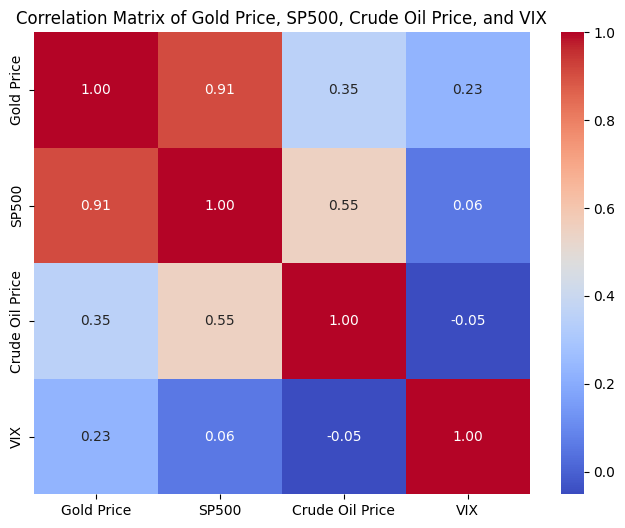

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title('Correlation Matrix of Gold Price, SP500, Crude Oil Price, and VIX')

# Display the heatmap
plt.show()

In [31]:
# Create scatter plot for Gold Price vs. SP500 with trendline
fig_gold_sp500 = px.scatter(merged_df, x='Gold Price', y='SP500', trendline='ols', title='Gold Price vs. SP500 with Trendline')
fig_gold_sp500.show()

# Create scatter plot for Gold Price vs. Crude Oil Price with trendline
fig_gold_oil = px.scatter(merged_df, x='Gold Price', y='Crude Oil Price', trendline='ols', title='Gold Price vs. Crude Oil Price with Trendline')
fig_gold_oil.show()

# Create scatter plot for SP500 vs. Crude Oil Price with trendline
fig_sp500_oil = px.scatter(merged_df, x='SP500', y='Crude Oil Price', trendline='ols', title='SP500 vs. Crude Oil Price with Trendline')
fig_sp500_oil.show()

# Create scatter plot for Gold Price vs. VIX with trendline
fig_gold_vix = px.scatter(merged_df, x='Gold Price', y='VIX', trendline='ols', title='Gold Price vs. VIX with Trendline')
fig_gold_vix.show()

# Create scatter plot for SP500 vs. VIX with trendline
fig_sp500_vix = px.scatter(merged_df, x='SP500', y='VIX', trendline='ols', title='SP500 vs. VIX with Trendline')
fig_sp500_vix.show()

# Create scatter plot for Crude Oil Price vs. VIX with trendline
fig_oil_vix = px.scatter(merged_df, x='Crude Oil Price', y='VIX', trendline='ols', title='Crude Oil Price vs. VIX with Trendline')
fig_oil_vix.show()

#Long-Run Relationships
From 2015 onward, all three major price indexes, the S&P 500, crude oil, and gold, exhibited a general upward trend, reflecting the prolonged post-2008 crisis expansion and the accommodative monetary policies that characterized much of the period. The VIX, which measures implied equity volatility, remained subdued for most of the decade, punctuated only by sharp spikes during global crises. Once the series were normalized to a base of 100 (January 2015), their relative growth and volatility became clear: equities showed the strongest cumulative increase, gold rose steadily with intermittent accelerations, and oil fluctuated violently around a flatter mean.

The correlation matrix quantifies these relationships. The gold–S&P 500 correlation of 0.91 indicates an unusually strong positive relationship between a traditional safe-haven asset and a risk asset, suggesting that global liquidity and low real rates lifted all asset classes simultaneously. The S&P 500–oil correlation of 0.55 reflects moderate cyclicality between equities and energy markets, while the gold–oil correlation of 0.35 shows a weaker but still positive link. Both gold and oil maintain low correlations with the VIX (0.23 and –0.05, respectively). Although these figures may seem counterintuitive, they are consistent with a decade shaped by synchronized global liquidity, suppressed yields, and broad-based asset inflation.
#COVID-19 Pandemic: Liquidity Shock and Safe-Haven Behavior
The most dramatic episode shown in the combined line chart is the COVID-19 crash of early 2020, the first major global systemic shock of the period. As the pandemic spread in March 2020, the S&P 500 plunged over 30 percent within weeks, while the VIX soared to record highs, signaling panic and a desperate scramble for liquidity. Oil prices collapsed as lockdowns decimated demand, and the market briefly turned negative.

Gold’s performance during this period revealed its dual identity. Initially, it dropped alongside equities as investors sold liquid assets to raise cash. Soon after, gold rebounded sharply as the Federal Reserve slashed interest rates, launched large-scale asset purchases, and governments rolled out fiscal stimulus. These interventions stabilized markets, lowered real yields, and renewed demand for non-yielding safe-haven assets. By mid-2020, gold had reached record highs even as equities rebounded in a policy-driven recovery.
This episode explains the temporary breakdown in correlations: gold’s long-term positive relationship with equities inverted during the panic, while the VIX’s correlation with both assets turned sharply negative. Once liquidity returned, these distortions faded, leaving the high aggregate correlations seen in the matrix.

#Russian Invasion of Ukraine: Inflation and Commodity Shocks
The next major disruption occurred in early 2022, when Russia’s invasion of Ukraine triggered an energy-price shock and heightened geopolitical uncertainty. The VIX spiked, though not to pandemic levels, as markets priced in sanctions, supply disruptions, and slower growth. Brent crude briefly exceeded $130 per barrel, while gold rose as investors sought protection against inflation and geopolitical instability.

Equities declined moderately but avoided a collapse, cushioned by gains in energy and defense stocks. Within months, prices stabilized as the conflict remained regionally contained. Gold and oil moved more closely together, driven by shared inflation expectations. Their moderate correlations with equities reflected the inflationary, rather than deflationary, nature of this shock, while the VIX’s limited correlation underscored that this episode was a commodity-driven event, not a liquidity crisis.
#Conclusion:
Together, these crises demonstrate that cross-asset relationships depend on the type of macroeconomic stress. COVID-19 was a deflationary liquidity crisis; Ukraine was an inflationary supply shock.  Ultimately, correlations tighten in calm periods and diverge during crises, reminding policymakers and investors that cross-asset behavior must always be read relative to its economic and geopolitical context.

In terms of next steps, I would study the effects of the Russian invasion of Ukraine on the commodity and currency markets to understand the effect on different regions. Price fluctuations of commodities and exchange rate variations for countries who rely on trade, such as Russia, Egypt, Europe Union, and the US (safe haven currency), would allow me to better analyze and understand the larger effects of the invasion on markets and economies.
